In [1]:
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigs, eigsh
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

In [2]:
# File Paths
data_path = "./data"
figure_path = "./plots"
abundance_table_path = f"{data_path}/mm_16s_hiseqs_abundance_table.csv"
metadata_path = f"{data_path}/mm_16s_hiseqs_metadata_table.csv"

In [3]:
# Abundance Table
abundance_table = pd.read_csv(abundance_table_path, index_col=0)
abundance_table["Abundance"] = abundance_table.sum(axis=1)
abundance_table["Presence"] = abundance_table.drop("Abundance", axis=1).where(abundance_table == 0, 1).sum(axis=1)

# Metadata
metadata = pd.read_csv(metadata_path, index_col=0)
metadata = metadata.loc[metadata["trophic"].notna()]
abundance_table = abundance_table.filter(items=list(metadata["sequencing_id"]), axis=0)
metadata = metadata[metadata["sequencing_id"].isin(abundance_table.index)]

In [63]:
print(f"The data set is {abundance_table.shape[0]} samples by {abundance_table.shape[1]-2} OTUs")
print(f"The size of the matrix is {abundance_table.shape[0]*(abundance_table.shape[1]-2)}")
print(f"The number of zero entries in the matrix is {(abundance_table.drop(columns=['Abundance', 'Presence']) == 0).sum().sum()}")
print(f"The sparcity the matrix is {((abundance_table.drop(columns=['Abundance', 'Presence']) == 0).sum().sum())/(abundance_table.shape[0]*(abundance_table.shape[1]-2))}")

The data set is 1562 samples by 5999 OTUs
The size of the matrix is 9370438
The number of zero entries in the matrix is 9120450
The sparcity the matrix is 0.9733216312834042


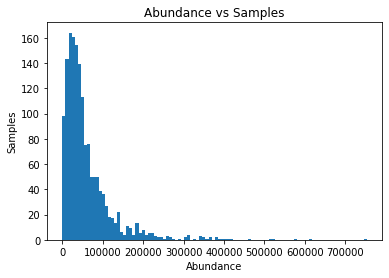

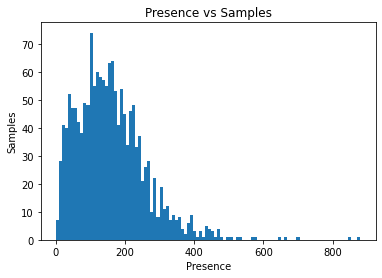

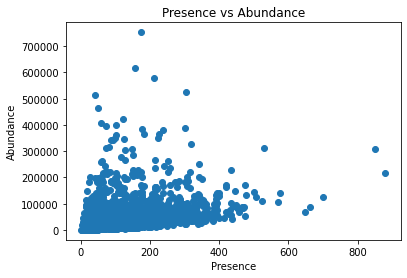

In [33]:
# Abundance & Presence Plots
def all_abundence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Abundance")
    plt.ylabel("Samples")
    plt.title(f"Abundance vs Samples")
    plt.hist(abundance_table["Abundance"], bins=100)
    plt.savefig(f"{figure_path}/abundance_hist_everything.png")
    plt.show()

def all_presence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Samples")
    plt.title(f"Presence vs Samples")
    plt.hist(abundance_table["Presence"], bins=100)
    plt.savefig(f"{figure_path}/presence_hist_everything.png")
    plt.show()

def all_presence_vs_abundance_scatter(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Abundance")
    plt.title(f"Presence vs Abundance")
    plt.scatter(x=abundance_table["Presence"], y=abundance_table["Abundance"])
    plt.savefig(f"{figure_path}/presence_vs_abundance_scatter_everything.png")
    plt.show()

all_abundence_hist(abundance_table)
all_presence_hist(abundance_table)
all_presence_vs_abundance_scatter(abundance_table)

In [68]:
def filtration(key, filterer):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata["sequencing_id"]), axis=0)
    filtered_metadata = filtered_metadata[filtered_metadata["sequencing_id"].isin(filtered_abundance.index)]
    return filtered_abundance, filtered_metadata

print(f"Number of PrimaryProducer: {filtration('trophic', 'PrimaryProducer')[0].shape[0]}")
print(f"Number of Environmental: {filtration('trophic', 'Environmental')[0].shape[0]}")
print(f"Number of Herbivore: {filtration('trophic', 'Herbivore')[0].shape[0]}")
print(f"Number of Omnivore: {filtration('trophic', 'Omnivore')[0].shape[0]}")
print(f"Number of Carnivore: {filtration('trophic', 'Carnivore')[0].shape[0]}")
print(f"Number of Detrivores: {filtration('trophic', 'Detritivore')[0].shape[0]}")

Number of PrimaryProducer: 516
Number of Environmental: 386
Number of Herbivore: 146
Number of Omnivore: 362
Number of Carnivore: 27
Number of Detrivores: 125


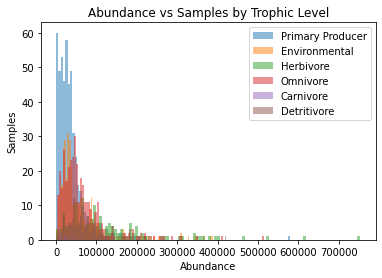

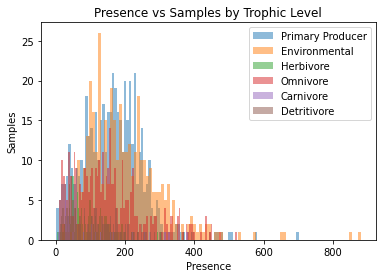

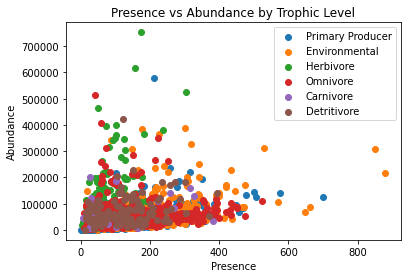

In [72]:
# Abundance & Presence Plots
def all_abundence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Abundance")
    plt.ylabel("Samples")
    plt.title(f"Abundance vs Samples by Trophic Level")
    plt.hist(filtration("trophic", "PrimaryProducer")[0]["Abundance"], alpha=0.5, bins=100, label="Primary Producer")
    plt.hist(filtration("trophic", "Environmental")[0]["Abundance"], alpha=0.5, bins=100, label="Environmental")
    plt.hist(filtration("trophic", "Herbivore")[0]["Abundance"], alpha=0.5, bins=100, label="Herbivore")
    plt.hist(filtration("trophic", "Omnivore")[0]["Abundance"], alpha=0.5, bins=100, label="Omnivore")
    plt.hist(filtration("trophic", "Carnivore")[0]["Abundance"], alpha=0.5, bins=100, label="Carnivore")
    plt.hist(filtration("trophic", "Detritivore")[0]["Abundance"], alpha=0.5, bins=100, label="Detritivore")
    plt.legend(loc="upper right")
    plt.savefig(f"{figure_path}/abundance_hist_all.png")
    plt.show()

def all_presence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Samples")
    plt.title(f"Presence vs Samples by Trophic Level")
    plt.hist(filtration("trophic", "PrimaryProducer")[0]["Presence"], alpha=0.5, bins=100, label="Primary Producer")
    plt.hist(filtration("trophic", "Environmental")[0]["Presence"], alpha=0.5, bins=100, label="Environmental")
    plt.hist(filtration("trophic", "Herbivore")[0]["Presence"], alpha=0.5, bins=100, label="Herbivore")
    plt.hist(filtration("trophic", "Omnivore")[0]["Presence"], alpha=0.5, bins=100, label="Omnivore")
    plt.hist(filtration("trophic", "Carnivore")[0]["Presence"], alpha=0.5, bins=100, label="Carnivore")
    plt.hist(filtration("trophic", "Detritivore")[0]["Presence"], alpha=0.5, bins=100, label="Detritivore")
    plt.legend(loc="upper right")
    plt.savefig(f"{figure_path}/presence_hist_all.png")
    plt.show()

def all_presence_vs_abundance_scatter(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Abundance")
    plt.title(f"Presence vs Abundance by Trophic Level")
    plt.scatter(x=filtration("trophic", "PrimaryProducer")[0]["Presence"], y=filtration("trophic", "PrimaryProducer")[0]["Abundance"], label="Primary Producer")
    plt.scatter(x=filtration("trophic", "Environmental")[0]["Presence"], y=filtration("trophic", "Environmental")[0]["Abundance"], label="Environmental")
    plt.scatter(x=filtration("trophic", "Herbivore")[0]["Presence"], y=filtration("trophic", "Herbivore")[0]["Abundance"], label="Herbivore")
    plt.scatter(x=filtration("trophic", "Omnivore")[0]["Presence"], y=filtration("trophic", "Omnivore")[0]["Abundance"], label="Omnivore")
    plt.scatter(x=filtration("trophic", "Carnivore")[0]["Presence"], y=filtration("trophic", "Carnivore")[0]["Abundance"], label="Carnivore")
    plt.scatter(x=filtration("trophic", "Detritivore")[0]["Presence"], y=filtration("trophic", "Detritivore")[0]["Abundance"], label="Detritivore")
    plt.legend(loc="upper right")
    plt.savefig(f"{figure_path}/presence_vs_abundance_scatter_all.png")
    plt.show()
    
all_abundence_hist(abundance_table)
all_presence_hist(abundance_table)
all_presence_vs_abundance_scatter(abundance_table)

In [4]:
def filtration(key, filterer):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    return filtered_abundance, filtered_metadata

In [78]:
for trophic_level in ["PrimaryProducer","Environmental","Herbivore","Omnivore","Carnivore","Detritivore"]:
    filtered_abundance_table, _ = filtration("trophic", trophic_level)
    mu = filtered_abundance_table["Presence"].mean()
    sigma = filtered_abundance_table["Presence"].std()
    print("For", trophic_level)
    print("mu:", mu)
    print("sigma:", sigma)
    print("Values one standard deviation away from the mean:",(filtered_abundance_table["Presence"] - mu).between(-sigma,sigma).sum() / filtered_abundance_table.shape[0])
    print("Values two standard deviations away from the mean:",(filtered_abundance_table["Presence"] - mu).between(-2*sigma,2*sigma).sum() / filtered_abundance_table.shape[0])
    print("Values three standard deviation away from the mean:",(filtered_abundance_table["Presence"] - mu).between(-3*sigma,3*sigma).sum() / filtered_abundance_table.shape[0])
    print("------------")

For PrimaryProducer
mu: 164.45736434108528
sigma: 89.85556978501292
Values one standard deviation away from the mean: 0.7248062015503876
Values two standard deviations away from the mean: 0.9689922480620154
Values three standard deviation away from the mean: 0.9844961240310077
------------
For Environmental
mu: 202.0181347150259
sigma: 109.93971043266473
Values one standard deviation away from the mean: 0.772020725388601
Values two standard deviations away from the mean: 0.9637305699481865
Values three standard deviation away from the mean: 0.9870466321243523
------------
For Herbivore
mu: 95.26712328767124
sigma: 56.45935872403727
Values one standard deviation away from the mean: 0.7397260273972602
Values two standard deviations away from the mean: 0.9657534246575342
Values three standard deviation away from the mean: 0.9863013698630136
------------
For Omnivore
mu: 153.34530386740332
sigma: 103.15176991775287
Values one standard deviation away from the mean: 0.6961325966850829
Values

In [6]:
# Analysis function
def abundance_to_eigenvector(filtered_abundance_table, debug=False, pandas_mode=False):
    adjacency_matrix = squareform(pdist(filtered_abundance_table, metric="minkowski", p=1))
    kernel = np.exp(- (adjacency_matrix ** 2) / (3000**2))
    diagonal = np.diag(np.sum(kernel,axis=1))
    laplacian = diagonal - kernel
    eigenvalues, eigenvectors = eigs(laplacian, k=len(laplacian) - 1, M=diagonal)
    sample_eigens = zip(eigenvalues.real, eigenvectors.T, filtered_abundance_table.index)
    eigenvalues, eigenvectors, sample_ids = zip(*sorted(sample_eigens, key = lambda tup:tup[0]))

    if debug:
        print("Adjacency Matrix:\n", adjacency_matrix, "\n")
        print("Kernel:\n", kernel, "\n")
        print("Diagonal:\n", diagonal, "\n")
        print("Laplacian:\n", laplacian, "\n")
        print("Eigenvalues:\n", eigenvalues, "\n")
        print("Eigenvectors:\n", eigenvectors, "\n")
        print("Sample ID's:\n", sample_ids, "\n")
    
    if pandas_mode:
        return pd.DataFrame(eigenvectors, columns = filtered_abundance_table.index), filtered_abundance_table.index
    
    return eigenvectors, filtered_abundance_table.index, eigenvalues

In [7]:
# Eigenvector 3D function
def eigenvector_to_plot(eigenvectors, metadata, title, text = None, color_descriptor = "gps"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    labels = eigenvectors.columns
    eigenvectors = eigenvectors.to_numpy()
    
    if text == None and color_descriptor == None:
        ax.scatter3D(eigenvectors[1], eigenvectors[2], eigenvectors[3])
    if text == "samples":
        for label, x, y, z in zip(labels, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            ax.text(x, y, z, label, None)
    if color_descriptor == "gps":
        location_number = metadata["lat"] + metadata["long"]
        color_number = (location_number - min(location_number)) / (max(location_number) - min(location_number))
        colors = [(0, color, 0) for color in color_number]
        for color, x, y, z in zip(colors, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            ax.scatter(x, y, z, color=color)
        custom_lines = [Line2D([0], [0], color=(0, 1, 0), lw=4),
                        Line2D([0], [0], color=(0, 0, 0), lw=4)]
        ax.legend(custom_lines, ['Higher Elevation', 'Lower Elevation'], loc ="center left", bbox_to_anchor=(-.1, 0))
    elif color_descriptor == "standard":
        for label, x, y, z in zip(labels, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            if metadata.loc[label]["host"] == "Animal" and metadata.loc[label]["habitat"] == "Marine":
                ax.scatter(x,y,z,c="C0", marker=".")
            if metadata.loc[label]["host"] == "Animal" and metadata.loc[label]["habitat"] == "Riverine":
                ax.scatter(x,y,z,c="C1", marker=".")
            if metadata.loc[label]["host"] == "Animal" and metadata.loc[label]["habitat"] == "Terrestrial":
                ax.scatter(x,y,z,c="C2", marker=".")
            if metadata.loc[label]["host"] == "Nonhost" and metadata.loc[label]["habitat"] == "Marine":
                ax.scatter(x,y,z,c="C0", marker="^")
            if metadata.loc[label]["host"] == "Nonhost" and metadata.loc[label]["habitat"] == "Riverine":
                ax.scatter(x,y,z,c="C1", marker="^")
            if metadata.loc[label]["host"] == "Nonhost" and metadata.loc[label]["habitat"] == "Terrestrial":
                ax.scatter(x,y,z,c="C2", marker="^")
            if metadata.loc[label]["host"] == "Plant" and metadata.loc[label]["habitat"] == "Marine":
                ax.scatter(x,y,z,c="C0", marker="s")
            if metadata.loc[label]["host"] == "Plant" and metadata.loc[label]["habitat"] == "Riverine":
                ax.scatter(x,y,z,c="C1", marker="s")
            if metadata.loc[label]["host"] == "Plant" and metadata.loc[label]["habitat"] == "Terrestrial":
                ax.scatter(x,y,z,c="C2", marker="s")
    elif color_descriptor == "sites":
        for label, x, y, z in zip(labels, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            if metadata.loc[label]["site_name"] == "TwinRocks":
                ax.scatter(x,y,z,c="C0")
            if metadata.loc[label]["site_name"] == "UppersBeach":
                ax.scatter(x,y,z,c="C1")
            if metadata.loc[label]["site_name"] == "WaimeaBay":
                ax.scatter(x,y,z,c="C2")
            if metadata.loc[label]["site_name"] == "ThreeTablesBeach":
                ax.scatter(x,y,z,c="C3")
            if metadata.loc[label]["site_name"] == "SharksCove":
                ax.scatter(x,y,z,c="C4")
        custom_lines = [Line2D([0], [0], color="C0", lw=4),
                        Line2D([0], [0], color="C1", lw=4),
                        Line2D([0], [0], color="C2", lw=4),
                        Line2D([0], [0], color="C3", lw=4),
                        Line2D([0], [0], color="C4", lw=4)]
        ax.legend(custom_lines, ['TwinRocks', 'UppersBeach', 'WaimeaBay', 'ThreeTablesBeach', 'SharksCove'], loc ="center left", bbox_to_anchor=(-.1, 0))
    elif color_descriptor == "coral_type":
        for label, x, y, z in zip(labels, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            if "CoralType1A" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C0")
            elif "CoralType1B" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C1")
            elif "CoralType1C" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C2")
            elif "CoralType2A" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C3")
            elif "CoralType2B" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C4")
            elif "CoralType2C" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C5")
            elif "CoralType3A" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C6")
            elif "CoralType3B" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C7")
            elif "CoralType3C" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C8")
            custom_lines = [Line2D([0], [0], color="C0", lw=4),
                        Line2D([0], [0], color="C1", lw=4),
                        Line2D([0], [0], color="C2", lw=4),
                        Line2D([0], [0], color="C3", lw=4),
                        Line2D([0], [0], color="C4", lw=4),
                        Line2D([0], [0], color="C5", lw=4),
                        Line2D([0], [0], color="C6", lw=4),
                        Line2D([0], [0], color="C7", lw=4),
                        Line2D([0], [0], color="C8", lw=4)]
        ax.legend(custom_lines, ["CoralType1A", "CoralType1B", "CoralType1C", "CoralType2A", "CoralType2B", "CoralType2C", "CoralType3A", "CoralType3B", "CoralType3C"], loc ="center left", bbox_to_anchor=(-.1, 0))
    elif color_descriptor == "coral_type_non_specific":
        for label, x, y, z in zip(labels, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            if "CoralType1" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C0")
            elif "CoralType2" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C1")
            elif "CoralType3" in metadata.loc[label]["collection_label"]:
                ax.scatter(x,y,z,c="C2")
            custom_lines = [Line2D([0], [0], color="C0", lw=4),
                        Line2D([0], [0], color="C1", lw=4),
                        Line2D([0], [0], color="C2", lw=4)]
        ax.legend(custom_lines, ["CoralType1", "CoralType2", "CoralType3"], loc ="center left", bbox_to_anchor=(-.1, 0))
    elif color_descriptor != None:
        for color, x, y, z in zip(color_descriptor, eigenvectors[1], eigenvectors[2], eigenvectors[3]):
            ax.scatter(x, y, z, c=color)
    plt.title(title)
    plt.show()
    plt.savefig(f"{figure_path}/{title}.png")

In [65]:
# Abundance & Presence Plots
def abundence_hist(abundance_table, key, filterer):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    plt.figure()
    plt.xlabel("Abundance")
    plt.ylabel("Samples")
    plt.title(f"Abundance vs Samples {key.capitalize()} {filterer.capitalize()}")
    plt.hist(filtered_abundance["Abundance"], bins=100)
    plt.savefig(f"{figure_path}/abundance_hist_{key}_{filterer}.png")
    plt.show()

def presence_hist(abundance_table, key, filterer):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Samples")
    plt.title(f"Presence vs Samples {key.capitalize()} {filterer.capitalize()}")
    plt.hist(filtered_abundance["Presence"].loc[(filtered_abundance["Presence"] != 0).any(1)], bins=100)
    plt.savefig(f"{figure_path}/presence_hist_{key}_{filterer}.png")
    plt.show()

def presence_vs_abundance_scatter(abundance_table, key, filterer):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Abundance")
    plt.title(f"Presence vs Abundance {key.capitalize()} {filterer.capitalize()}")
    plt.scatter(x=filtered_abundance["Presence"], y=filtered_abundance["Abundance"])
    plt.savefig(f"{figure_path}/presence_vs_abundance_scatter_{key}_{filterer}.png")
    plt.show()

In [64]:
def trophic_counter(abundance_table, key, filterer):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    print(f"{filterer}: {filtered_metadata.shape[0]}")

trophic_counter(abundance_table, "host", "Nonhost")
trophic_counter(abundance_table, "host", "Plant")
trophic_counter(abundance_table, "host", "Animal")

Nonhost: 240
Plant: 110
Animal: 109


In [33]:
def trophic_counter(abundance_table, key, filterer):
    filtered_metadata = metadata.loc[metadata[key].isna()]
    filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    print(f"{filterer}: {filtered_metadata.shape[0]}")
    
trophic_counter(abundance_table, "trophic", "Null")

Null: 14


In [34]:
metadata.shape[0]

556

In [26]:
trophic_counter(abundance_table, "trophic", "Carnivore")
trophic_counter(abundance_table, "trophic", "Herbivore")
trophic_counter(abundance_table, "trophic", "PrimaryProducer")
trophic_counter(abundance_table, "trophic", "Environmental")

Carnivore: 34
Herbivore: 39
PrimaryProducer: 146
Environmental: 240
NaN: 0


In [29]:
print(metadata.loc[105175])

run                      Miseq04_16S
index                   TGTCAAAGTGAC
sample_barcode                   833
locus                   bacterial16S
primer_plate                       1
primer_row                         H
primer_col                        12
extraction_well                  G12
forward_primer                  515f
reverse_primer                  806r
primer_name                515rcbc83
sample_id           WMEA_00833_NA_NA
collection_label         PCRNegative
project                SuperTransect
site_order                       NaN
site_code                        NaN
site_name                        Lab
transect_name                    NaN
collection_date                  NaN
sample_type              PCRNegative
habitat                          NaN
host                             NaN
trophic                          NaN
site_type                        NaN
metadata                         NaN
lat                              NaN
long                             NaN
p

In [9]:
abundence_hist(abundance_table, "sample_type", "Mosquito")
presence_hist(abundance_table, "sample_type", "Mosquito")
presence_vs_abundance_scatter(abundance_table, "sample_type", "Mosqitio")

"""
abundence_hist(abundance_table, "sample_type", "Coral")
presence_hist(abundance_table, "sample_type", "Coral")
presence_vs_abundance_scatter(abundance_table, "sample_type", "Coral")
abundence_hist(abundance_table, "sample_type", "Drosophila")
presence_hist(abundance_table, "sample_type", "Drosophila")
presence_vs_abundance_scatter(abundance_table, "sample_type", "Drosophila")
"""

'\nabundence_hist(abundance_table, "sample_type", "Coral")\npresence_hist(abundance_table, "sample_type", "Coral")\npresence_vs_abundance_scatter(abundance_table, "sample_type", "Coral")\nabundence_hist(abundance_table, "sample_type", "Drosophila")\npresence_hist(abundance_table, "sample_type", "Drosophila")\npresence_vs_abundance_scatter(abundance_table, "sample_type", "Drosophila")\n'

In [14]:
abundence_hist(abundance_table, "trophic", "Herbivore")
presence_hist(abundance_table, "trophic", "Herbivore")
presence_vs_abundance_scatter(abundance_table, "trophic", "Herbivore")

"""
abundence_hist(abundance_table, "sample_type", "Coral")
presence_hist(abundance_table, "sample_type", "Coral")
presence_vs_abundance_scatter(abundance_table, "sample_type", "Coral")
abundence_hist(abundance_table, "sample_type", "Drosophila")
presence_hist(abundance_table, "sample_type", "Drosophila")
presence_vs_abundance_scatter(abundance_table, "sample_type", "Drosophila")
"""

'\nabundence_hist(abundance_table, "sample_type", "Coral")\npresence_hist(abundance_table, "sample_type", "Coral")\npresence_vs_abundance_scatter(abundance_table, "sample_type", "Coral")\nabundence_hist(abundance_table, "sample_type", "Drosophila")\npresence_hist(abundance_table, "sample_type", "Drosophila")\npresence_vs_abundance_scatter(abundance_table, "sample_type", "Drosophila")\n'

In [10]:
key = "host"
filterer = "Animal"
filtered_metadata = metadata.loc[metadata[key] == filterer]
filtered_abundance = abundance_table.filter(
        items=list(filtered_metadata.index), axis=0)
filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
filtered_abundance

,Otu00003,Otu00004,Otu00005,Otu00006,Otu00007,Otu00008,Otu00009,Otu00010,Otu00011,Otu00012,...,Otu25365,Otu25380,Otu25387,Otu25399,Otu25438,Otu25456,Otu25470,Otu25476,Abundance,Presence
105635,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3660,377
105631,4,0,0,0,0,0,12,0,0,0,...,0,0,0,3,0,0,0,0,3682,215
105629,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,3696,156
105617,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3694,182
105615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3661,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105246,2444,0,0,0,1201,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3697,19
105200,2072,0,0,0,1593,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3698,14
105153,1993,0,0,43,1499,0,20,0,0,0,...,0,0,0,0,0,0,0,0,3700,51
105132,3622,0,0,0,66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3700,7


In [6]:
# Filtering function
def filtered_data(key, filterer, dropper = None):
    filtered_metadata = metadata.loc[metadata[key] == filterer]
    if dropper == None:
        filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0).drop(["Abundance", "Presence"],axis=1)
    if dropper != None:
        filtered_abundance = abundance_table.filter(
            items=list(filtered_metadata.index), axis=0).drop(["Abundance", "Presence"],axis=1).drop(dropper, axis=0)
    filtered_metadata = filtered_metadata.loc[filtered_abundance.index]
    return filtered_abundance, filtered_metadata

In [11]:
# Filtering Based on Drosophila
filtered_abundance, filtered_metadata  = filtered_data("host", "Animal")
#filtered_metadata.to_csv("./animal.csv")
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "Animal Generalized Eigenvectors")

In [7]:
# Filtering Based on Drosophila
filtered_abundance, filtered_metadata  = filtered_data("sample_type", "Drosophila")
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "Drosophila Generalized Eigenvectors")

/home/zjabbar/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# Filtering Based on Drosophila
filtered_abundance, filtered_metadata  = filtered_data("sample_type", "Drosophila")
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "Drosophila Generalized Eigenvectors")

In [7]:
# Filtering Based on Coral
filtered_abundance, filtered_metadata  = filtered_data("sample_type", "Coral")
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "Coral Generalized Eigenvectors", color_descriptor="coral_type_non_specific") # 105467, 105548; 105566

/home/zjabbar/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


In [9]:
# Filtering Based on Mosquito
filtered_abundance, filtered_metadata  = filtered_data("sample_type", "Mosquito")
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "Mosquito Generalized Eigenvectors")

/home/zjabbar/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
# Filtering Based on Mosquito
filtered_abundance, filtered_metadata  = filtered_data("sample_type", "Mosquito", dropper = [105279, 105525, 105502])
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "Mosquito Generalized Eigenvectors Dropped 3")

/home/zjabbar/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
# Using All Data
filtered_abundance, filtered_metadata  = abundance_table, metadata
eigenvectors, filtered_abundance_index = abundance_to_eigenvector(filtered_abundance, pandas_mode = True)
eigenvector_to_plot(eigenvectors, filtered_metadata, "All Generalized Eigenvectors", color_descriptor="standard")

/home/zjabbar/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
# Eigenvalues
filtered_abundance, filtered_metadata  = filtered_data("host", "Animal")
eigenvectors, filtered_abundance_index, eigenvalues = abundance_to_eigenvector(filtered_abundance)
print(eigenvalues)
plt.figure()
plt.title = "Eigenvalues"
plt.plot(eigenvalues, linestyle="", marker=".")

(7.122827492742301e-17, 0.046944116676849966, 0.09231920771186891, 0.18020807529211777, 0.20869946874320458, 0.21922528976029013, 0.2264191845123947, 0.2552085875211022, 0.26208904209463413, 0.2653555555560466, 0.27512096631898186, 0.2886399693441487, 0.2981694290761307, 0.2988882139228235, 0.3147541773461532, 0.3322502975204712, 0.37661916908992743, 0.4096446983643368, 0.41772924092373626, 0.4217014217174079, 0.42874007661538915, 0.4495485520239819, 0.4495919809017021, 0.4844033501092248, 0.5338391298487144, 0.5508320854844418, 0.5538325866712612, 0.5583440176790819, 0.5619421551577596, 0.5753929949326224, 0.5856604786148532, 0.5924463009218793, 0.6175279677711993, 0.6191451873943254, 0.6256556608386664, 0.6339582868183785, 0.6356532633440748, 0.6444401572787455, 0.6485934803064693, 0.6524378700981794, 0.6628950333630925, 0.6651950786718133, 0.6704881955858996, 0.6862548193431917, 0.695733544970987, 0.7032147648153609, 0.7119702223524846, 0.7222170319390918, 0.7268390680556731, 0.7273

/home/zjabbar/.local/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1267: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
carnivore_metadata = metadata.loc[metadata["trophic"] == "Carnivore"]
carnivore_abundance = abundance_table.filter(
    items=list(carnivore_metadata.index), axis=0)
carnivore_metadata = carnivore_metadata.loc[carnivore_abundance.index]
    
herbivore_metadata = metadata.loc[metadata["trophic"] == "Herbivore"]
herbivore_abundance = abundance_table.filter(
    items=list(herbivore_metadata.index), axis=0)
herbivore_metadata = herbivore_metadata.loc[herbivore_abundance.index]
    
environmental_metadata = metadata.loc[metadata["trophic"] == "Environmental"]
environmental_abundance = abundance_table.filter(
    items=list(environmental_metadata.index), axis=0)
environmental_metadata = environmental_metadata.loc[environmental_abundance.index]
    
primary_metadata = metadata.loc[metadata["trophic"] == "PrimaryProducer"]
primary_abundance = abundance_table.filter(
    items=list(primary_metadata.index), axis=0)
primary_metadata = primary_metadata.loc[primary_abundance.index]

In [39]:
# Abundance & Presence Plots
def all_abundence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Abundance")
    plt.ylabel("Samples")
    plt.title(f"Abundance vs Samples by Trophic Level")
    plt.hist(carnivore_abundance["Abundance"], alpha=0.5, bins=100, label="Carnivore")
    plt.hist(herbivore_abundance["Abundance"], alpha=0.5, bins=100, label="Herbivore")
    plt.hist(environmental_abundance["Abundance"], alpha=0.5, bins=100, label="Environmental")
    plt.hist(primary_abundance["Abundance"], alpha=0.5, bins=100, label="Primary Producer")
    plt.legend(loc="upper left")
    plt.savefig(f"{figure_path}/abundance_hist_all.png")
    plt.show()

def all_presence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Samples")
    plt.title(f"Presence vs Samples by Trophic Level")
    plt.hist(carnivore_abundance["Presence"], alpha=0.5, bins=100, label="Carnivore")
    plt.hist(herbivore_abundance["Presence"], alpha=0.5, bins=100, label="Herbivore")
    plt.hist(environmental_abundance["Presence"], alpha=0.5, bins=100, label="Environmental")
    plt.hist(primary_abundance["Presence"], alpha=0.5, bins=100, label="Primary Producer")
    plt.legend(loc="upper right")
    plt.savefig(f"{figure_path}/presence_hist_all.png")
    plt.show()

def all_presence_vs_abundance_scatter(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Abundance")
    plt.title(f"Presence vs Abundance by Trophic Level")
    plt.scatter(x=carnivore_abundance["Presence"], y=carnivore_abundance["Abundance"], label="Carnivore")
    plt.scatter(x=herbivore_abundance["Presence"], y=herbivore_abundance["Abundance"], label="Herbivore")
    plt.scatter(x=environmental_abundance["Presence"], y=environmental_abundance["Abundance"], label="Environmental")
    plt.scatter(x=primary_abundance["Presence"], y=primary_abundance["Abundance"], label="Primary Producer")
    plt.legend(loc="lower left")
    plt.savefig(f"{figure_path}/presence_vs_abundance_scatter_all.png")
    plt.show()

In [82]:
plt.close('all')

In [80]:
# Abundance & Presence Plots
def all_abundence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Abundance")
    plt.ylabel("Samples")
    plt.title(f"Abundance vs Samples")
    plt.hist(abundance_table["Abundance"], bins=100)
    plt.savefig(f"{figure_path}/abundance_hist_everything.png")
    plt.show()

def all_presence_hist(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Samples")
    plt.title(f"Presence vs Samples")
    plt.hist(abundance_table["Presence"], bins=100)
    plt.savefig(f"{figure_path}/presence_hist_everything.png")
    plt.show()

def all_presence_vs_abundance_scatter(abundance_table):
    plt.figure()
    plt.xlabel("Presence")
    plt.ylabel("Abundance")
    plt.title(f"Presence vs Abundance")
    plt.scatter(x=abundance_table["Presence"], y=abundance_table["Abundance"])
    plt.savefig(f"{figure_path}/presence_vs_abundance_scatter_everything.png")
    plt.show()

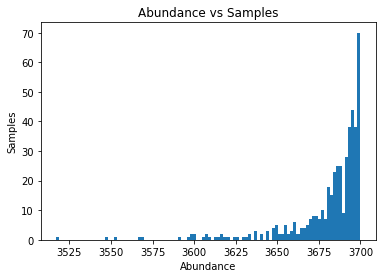

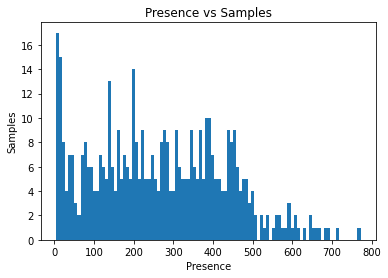

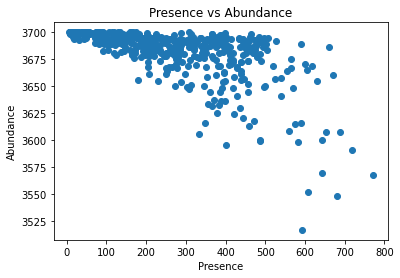

In [81]:
all_abundence_hist(abundance_table)
all_presence_hist(abundance_table)
all_presence_vs_abundance_scatter(abundance_table)

In [4]:
abundance_table

,Otu000002,Otu000004,Otu000005,Otu000011,Otu000012,Otu000015,Otu000017,Otu000018,Otu000021,Otu000022,...,Otu293098,Otu312139,Otu323635,Otu323649,Otu323902,Otu345606,Otu357907,Otu370758,Abundance,Presence
Group,,,,,,,,,,,,,,,,,,,,,
102044,0,0,9,165,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,72236,246
102045,0,52,0,3954,29,23,7,16,0,0,...,0,0,0,0,0,0,0,0,170257,258
102046,0,0,0,1741,11,0,0,19,0,0,...,0,0,0,0,0,0,0,0,112677,125
102047,0,0,7,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10978,76
102048,0,0,0,0,33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12841,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,53845,152
104477,0,0,0,0,0,0,0,199,0,0,...,0,0,0,0,0,0,0,0,114257,196
104407,0,0,0,0,0,0,0,64,0,9,...,0,0,0,0,0,0,0,0,90487,244
